In [3]:
%matplotlib inline
# the above line is literally called magic. it basically is
# it helps with plotting in the notebooks

# we're going to need all of these so lets import now
# best practice of course is to do this in the first cell
import numpy as np  # common convention, lets stick to it
import scipy.optimize as opt  # we'll need this for fitting!
from matplotlib import pyplot as plt # also the common convention

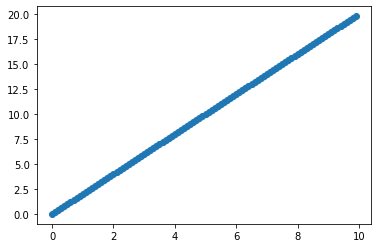

In [4]:
# start with linear data
# lets make a function that makes a line!

def line(x, m, b):
    # the order of these arguments is important later
    # and good practice
    # the x input is first because we will pass many x points
    #the function we will use requires ikndependent variables to go first

    return m * x + b  # as expected


x_data = np.arange(0, 10, 0.1)  # from 0 to 10 in steps of 0.1
y_data = line(x_data, 2, 0) #here the line function is called

plt.scatter(x_data, y_data)
plt.show() #makes the output that wasn't specifically called, leaves just the graph

100
41


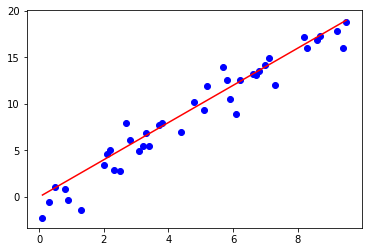

In [5]:
# boring but that's the point
# lets make something that looks like real data

x_data = np.arange(0, 10, 0.1) #the same x data
print (len(x_data))
# data isn't evenly spaced
# we're going to randomly choose points to keep
# we create a random array of boolean values (t or f)
# then "slice" x_data; only the indices where cut is true will be kept
cut = np.random.choice(a=[False, True], size=x_data.shape) # want the array to be the size of x_data
x_data = x_data[cut] #selects values of x_data when x in cut is true
print (len(x_data)) #this will change everytime 

#cut2= x_data>3
#x_data[cut2]= produces numbers above 3
#boolean indexing can be really powerful
#a nice way to get a smaller number of values

y_data = line(x_data, 2, 0) #using the line function

# cool but still a perfect line
# lets add noise

y_data_noisy = y_data + np.random.randn(len(y_data)) * 2  #randn is random guassian noise the length of our y-data
#the *2 is the scale the noise bigger (makes the stddev bigger)

plt.scatter(x_data, y_data_noisy, c='b') #this is the noisy data
plt.plot(x_data, y_data, c='r') #this is the straight line data 
plt.show()

2.075929785181822 -0.8541510707091513
[ 2.07592979 -0.85415107]
2.075929785181822 -0.8541510707091513


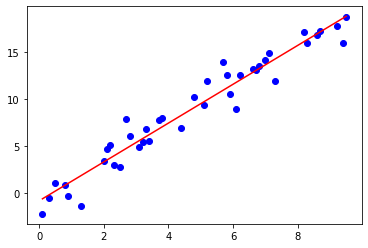

In [6]:
# now suppose we don't have y_data and know m or b, as usually happens
# that's where fitting comes in!

popt, pcov = opt.curve_fit(line, x_data, y_data_noisy)
#needs function,x, data we want to fit
#good idea to always define your own function
#in one line it does the chi^2 optimization
#popt is the optimal parameters IN THE ORDER THEY ARE PASSED IN
#pcov is the covariance matrix [mxn matrix]


print(*popt)  # woah what's that *!?
# "Starred" expressions are very handy in python
# it means "unpack" basically. 
# *popt is short hand for popt[0], popt[1], ... , popt[n]
#popt is a list
print (popt)
# in this case its just 0 and 1, but this saves lots of typing!
# of course this is equivalent to the long version, as can be seen
print(popt[0], popt[1])


plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, line(x_data, *popt), c='r') #print the line with the fitting parameters m and b
plt.show()

In [7]:
# cool that's pretty close
# now let's try it on real data!

# we're going to use numpy's built in text file reader
# names=True means use headers
# delimiter="," is the character seperating the columns
# and many thanks to https://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2011.ems
# for the data
#this is a good file to use also pandas
#can also do yourself
data = np.genfromtxt("co2_emmissions.dat", names=True, delimiter=",") #names=true there are titles
#delimeter says what distinguishes columns

# this structure is a numpy array, sometimes called a "rec array" because it has named columns
# we can see a row (the first row)(record array)
print(data[0]) 
#nan = not defined
# we can see the names of the columns
print(data.dtype) #what is in the reporay
#f8 is floar
# and access data by column
print(data["Year"])#collecting the column year
# and as with all arrays we can access sub-pieces
print(data["Year"][:10]) #give me the first 10 years

(1751., 3., 0., 0., 3., 0., 0., nan)
[('Year', '<f8'), ('Total', '<f8'), ('Gas', '<f8'), ('Liquids', '<f8'), ('Solids', '<f8'), ('Cement_Production', '<f8'), ('Gas_Flaring', '<f8'), ('Per_Capita', '<f8')]
[1751. 1752. 1753. 1754. 1755. 1756. 1757. 1758. 1759. 1760. 1761. 1762.
 1763. 1764. 1765. 1766. 1767. 1768. 1769. 1770. 1771. 1772. 1773. 1774.
 1775. 1776. 1777. 1778. 1779. 1780. 1781. 1782. 1783. 1784. 1785. 1786.
 1787. 1788. 1789. 1790. 1791. 1792. 1793. 1794. 1795. 1796. 1797. 1798.
 1799. 1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810.
 1811. 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822.
 1823. 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834.
 1835. 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846.
 1847. 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858.
 1859. 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870.
 1871. 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881

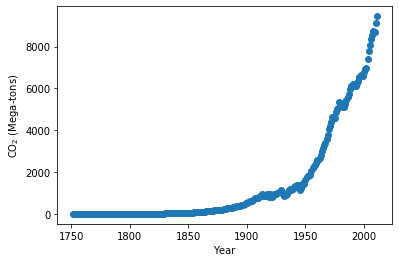

In [16]:
# cool lets see some trends!

plt.scatter(data["Year"], data["Total"])
plt.xlabel("Year")
plt.ylabel("CO$_2$ (Mega-tons)")
plt.show()

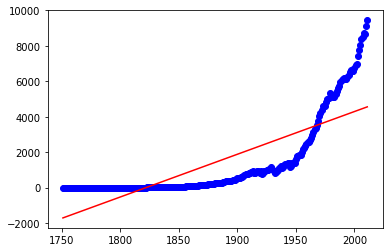

In [10]:
# Ignoring how terrifying that is...
# your assignment is to fit a trend to that data
# you may want to try multiple functions, e.g. exponential and polynomial

#this looks like an exponential
#however I want to practice my code skills, so I want to make a line, a polynomial and a exponential
#defining polynomial
def poly(x,a,c,d):
    return a*(x**2)+c*x+d
#defining exponential (I cannot trust myself to continuously spell exponential right)
#what do the physical meaning of a coefficient mean?
#p means inital scaling
#what about q and r, who knows?
def funtimes(x, p,q,r,):
    return p*(np.exp(x*q +r))

#trying the linear data
x_axis= data['Year']
y_axis= data['Total']
popt, pcov = opt.curve_fit(line, x_axis, y_axis)
plt.scatter(x_axis, y_axis, c='b')
plt.plot(x_axis, line(x_axis, *popt), c='r') 
plt.show()


0.24707640369940986 -905.408454166052 828906.5481814989


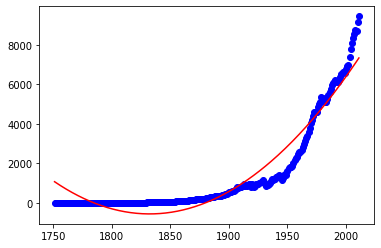

In [11]:
#try the polynomial fit 
popt, pcov = opt.curve_fit(poly, x_axis, y_axis)
print(*popt)
plt.scatter(x_axis, y_axis, c='b')
plt.plot(x_axis, poly(x_axis, *popt), c='r') 
plt.show()

8.333714196622094e-13 0.025226719438362962 -13.743612668323882


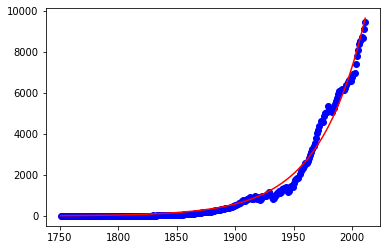

In [38]:
#trying the exponential data 
#without dividing x_axis by 40 the exponential blows up to infinity
#using the hint given in class and in the email
#in theory p0 can take 10-20 times of the function
#ran it a bit to change the values we were given, 1e-5, 0.01, .5
popt, pcov = opt.curve_fit(funtimes, x_axis, y_axis, p0=[1e-3, 1e-5, 1])
print (*popt)
plt.scatter(x_axis, y_axis, c='b')
plt.plot(x_axis, funtimes(x_axis, *popt), c='r')
plt.show()
#print(funtimes(x_axis, 1,2))